Intensity vs Fermi Chopper frequency

Just try the original parameters

In [1]:
cd ~/dv/sns-chops/resolution/CNCS/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/CNCS/PyChop


In [2]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [3]:
from mcni.utils import conversion as C

In [4]:
%matplotlib notebook

# Exp data

In [5]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from 'Vdata2018.pyc'>

In [6]:
expdata_highres = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_HighRes.dat'))
expdata_interm = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_Intermediate.dat'))
expdata_highflux = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_HighFlux.dat'))

reading data. please wait...
  done
reading data. please wait...
  done
reading data. please wait...
  done


<IPython.core.display.Javascript object>


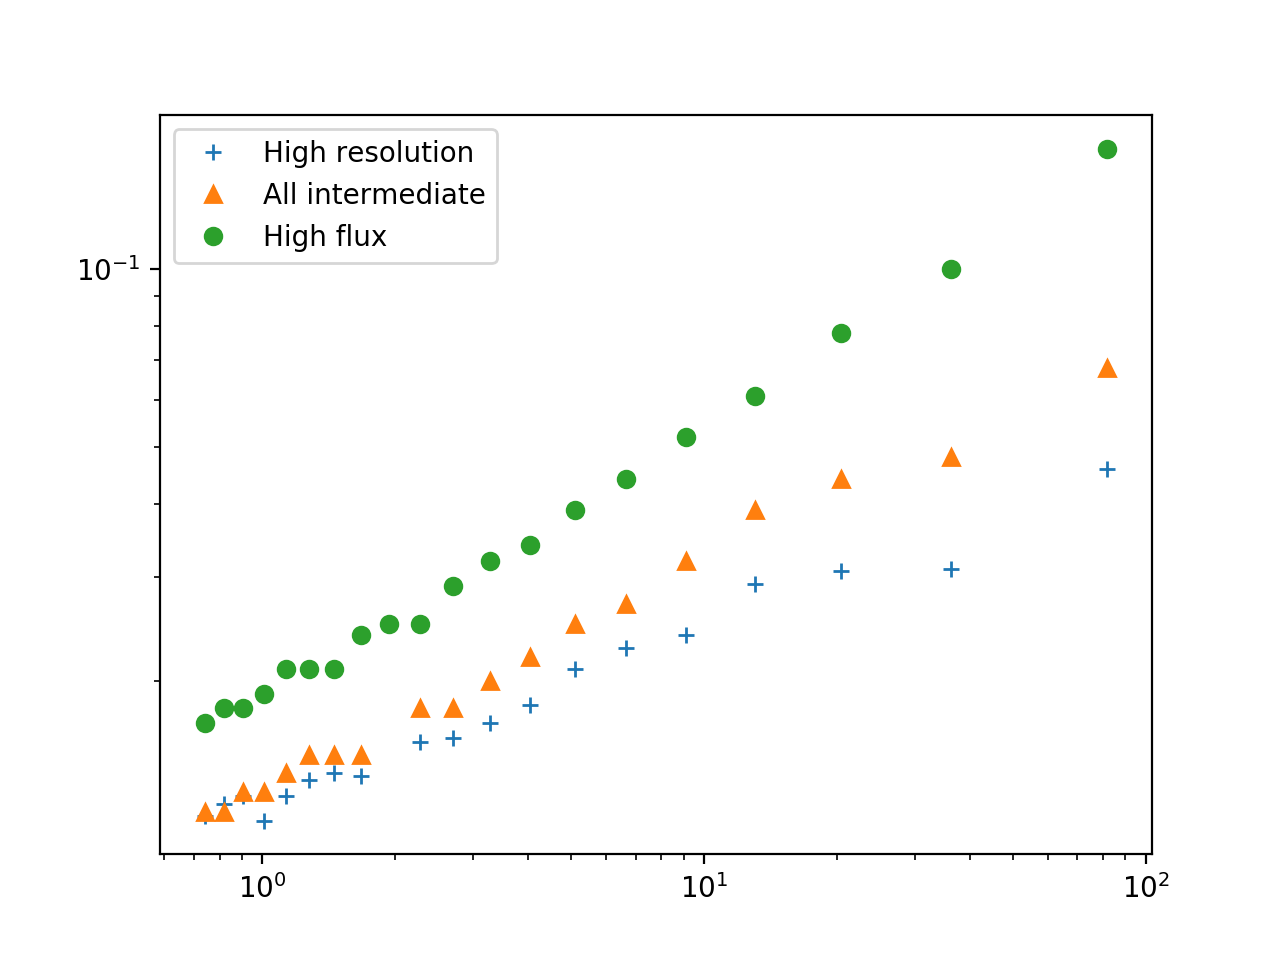

In [7]:
plt.figure()
plt.loglog(expdata_highres.Ei_list, expdata_highres.FWHM/np.array(expdata_highres.Ei_list), 
             '+', label='High resolution')
plt.loglog( expdata_interm.Ei_list, expdata_interm.FWHM/np.array(expdata_interm.Ei_list),
             '^', label='All intermediate')
plt.loglog(expdata_highflux.Ei_list, expdata_highflux.FWHM/np.array(expdata_highflux.Ei_list),
             'o', label='High flux')
plt.legend()

In [8]:
def sorted_xy_byx(x,y):
    s = np.argsort(x)
    return np.array(x)[s], np.array(y)[s]

<IPython.core.display.Javascript object>


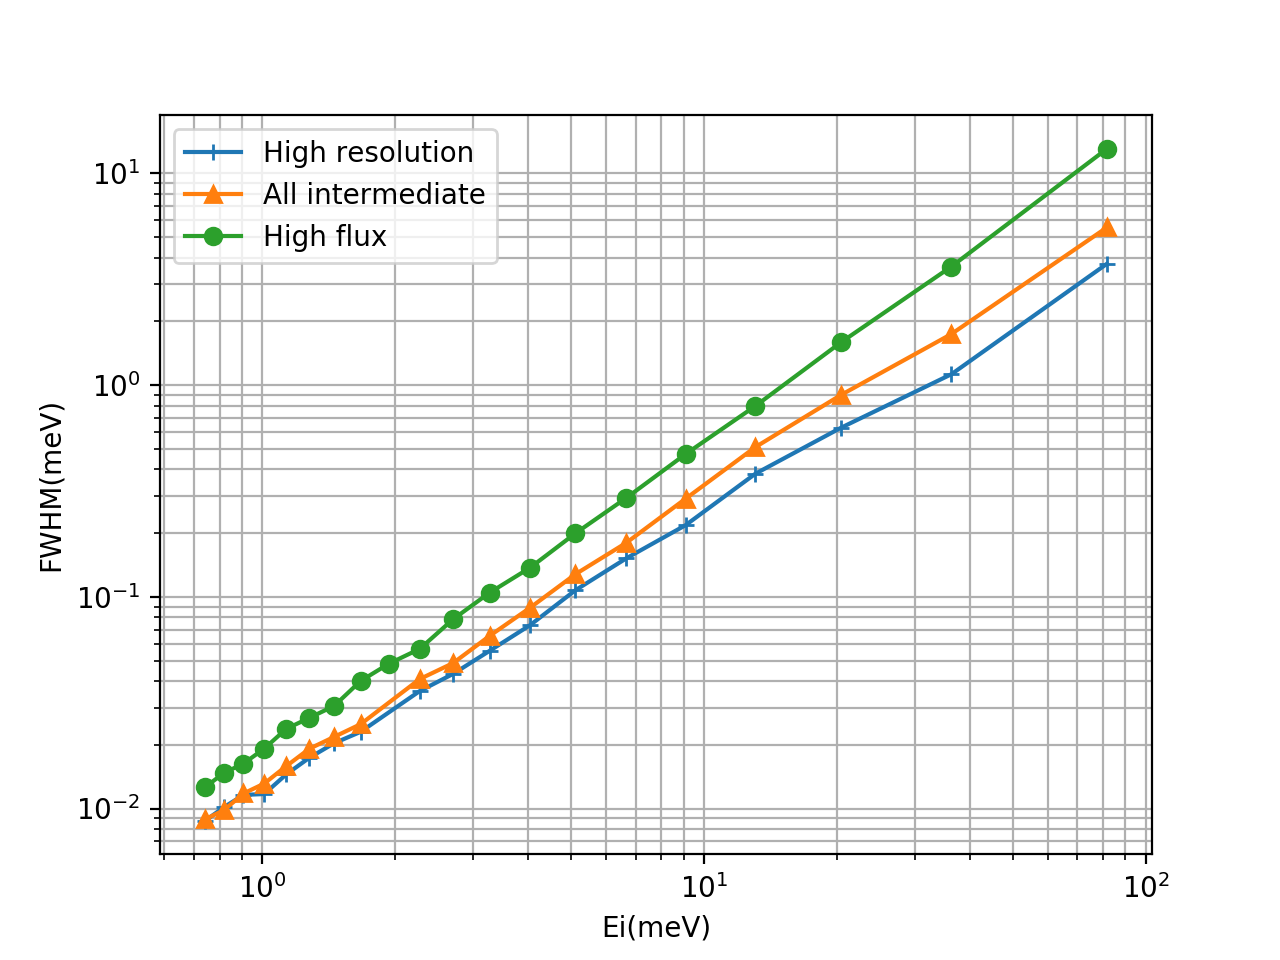

In [9]:
plt.figure()
x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
plt.loglog(x,y, '+-', label='High resolution')
x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
plt.loglog(x,y, '^-', label='All intermediate')
x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
plt.loglog(x,y, 'o-', label='High flux')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.yticks
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

# Load Daniel's data

In [41]:
import sys
sys.path.insert(0, '/SNS/CNCS/shared/UsefulMantidScripts_2018')

In [42]:
import cncs

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
plt.loglog(x,y, '+-', label='High resolution')
plt.loglog(cncs.Ei_list_0, cncs.fwhm_list_0, '+-', label='High resolution - Daniel')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

plt.subplot(1,3,2)
x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
plt.loglog(x,y, '^-', label='All intermediate')
plt.loglog(cncs.Ei_list_3, cncs.fwhm_list_3, '^-', label='Intermediate - Daniel')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

plt.subplot(1,3,3)
x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
plt.loglog(x,y, 'o-', label='High flux')
plt.loglog(cncs.Ei_list_1, cncs.fwhm_list_1, 'o-', label='High flux - Daniel')

plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

<IPython.core.display.Javascript object>


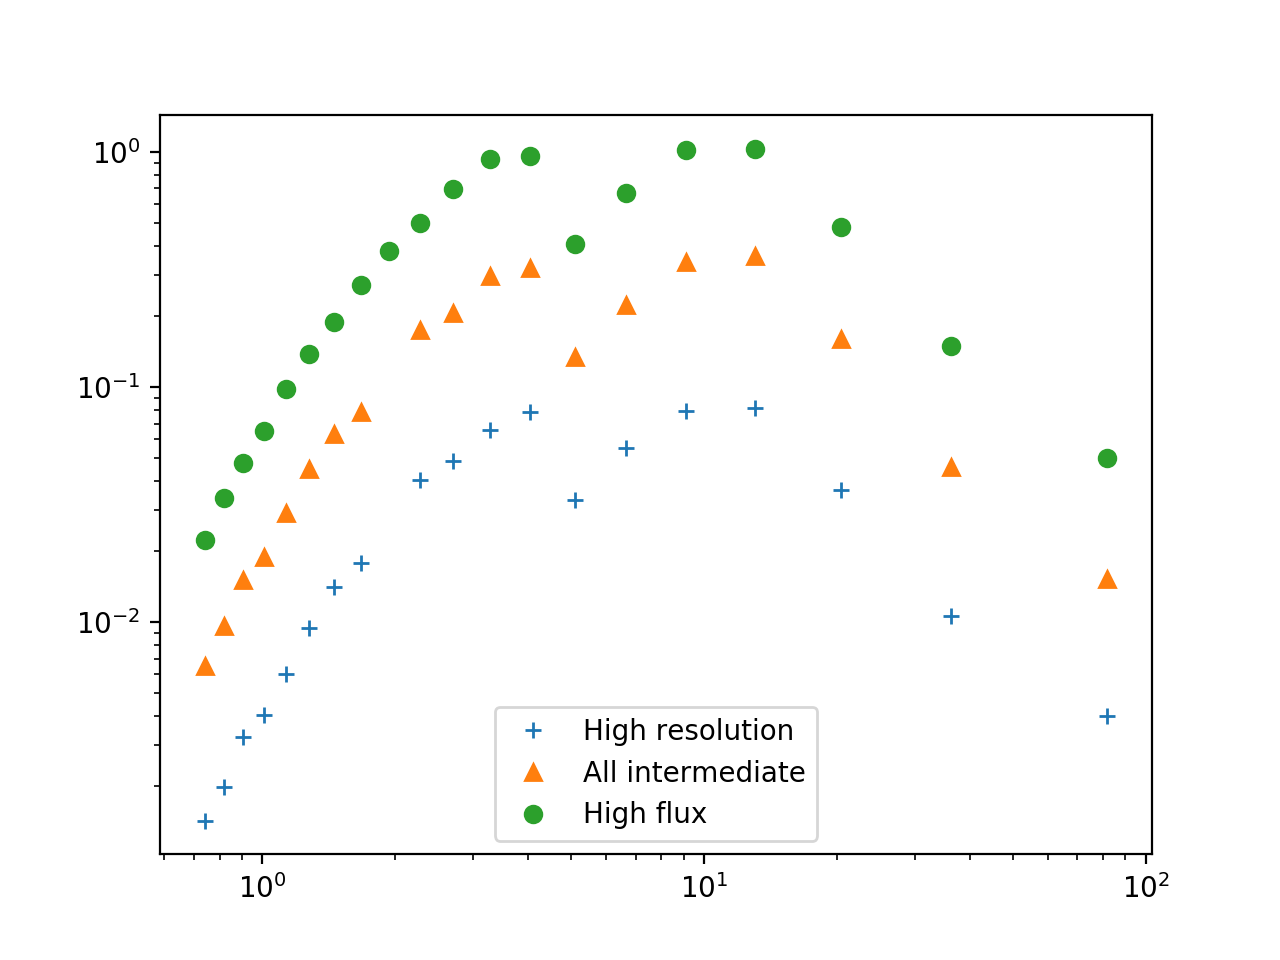

In [23]:
plt.figure()
plt.loglog(expdata_highres.Ei_list, expdata_highres.intensity, 
             '+', label='High resolution')
plt.loglog( expdata_interm.Ei_list, expdata_interm.intensity,
             '^', label='All intermediate')
plt.loglog(expdata_highflux.Ei_list, expdata_highflux.intensity,
             'o', label='High flux')
plt.legend()

# PyChop

In [10]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [11]:
from PyChop import PyChop2

In [12]:
import PyChop

In [13]:
instrument = PyChop2('cncs.yaml')

In [14]:
# instrument.setChopper('High Resolution')
#instrument.getResFlux(Etrans=0, Ei_in=10)

# Calc by hand

In [16]:
L1 = 34.784
L2 = 36.252-34.784
L3 = 3.5

In [17]:
ls 

cncs-no-mod-contrib.yaml
cncs-v1.yaml
cncs-v2.yaml
cncs.yaml
explore pychop - VRes vs Ei - by hand.ipynb
mcvine/
pychop - Intensity and VRes_vs_Ei.ipynb
pychop-mod-FWHM-from-data.ipynb
test_pychop.py
test_pychop.py~
Vdata2018.py
Vdata2018.pyc


In [18]:
Es, fwhms = np.loadtxt('../mcvine/beam-fwhms.txt').T

In [19]:
Es

array([  0.1       ,   0.11513954,   0.13257114,   0.1526418 ,
         0.17575106,   0.20235896,   0.23299518,   0.26826958,
         0.30888436,   0.35564803,   0.40949151,   0.47148664,
         0.54286754,   0.62505519,   0.71968567,   0.82864277,
         0.95409548,   1.09854114,   1.26485522,   1.45634848,
         1.67683294,   1.93069773,   2.22299648,   2.55954792,
         2.9470517 ,   3.39322177,   3.90693994,   4.49843267,
         5.17947468,   5.96362332,   6.86648845,   7.90604321,
         9.10298178,  10.48113134,  12.06792641,  13.89495494,
        15.9985872 ,  18.42069969,  21.20950888,  24.42053095,
        28.11768698,  32.37457543,  37.2759372 ,  42.9193426 ,
        49.41713361,  56.89866029,  65.51285569,  75.43120063,
        86.85113738, 100.        ])

<IPython.core.display.Javascript object>


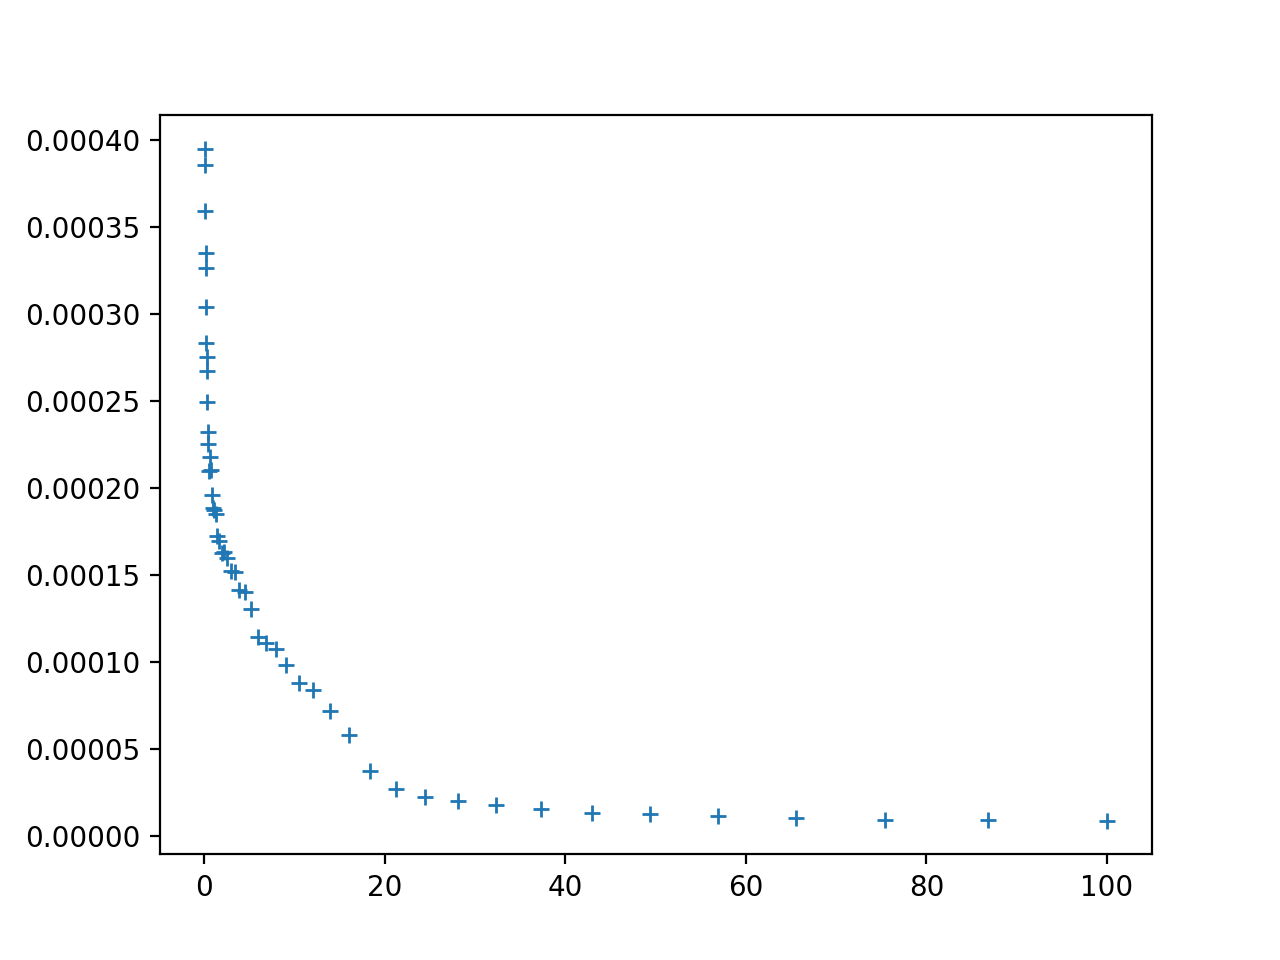

In [20]:
plt.figure()
plt.plot(Es, fwhms, '+')

In [21]:
from mcni.utils import conversion

In [22]:
def res(E=10, chopper_nu=180., theta=2.):
    """
    chopper_nu: Hz
    theta: degrees
    """
    vi = conversion.e2v(E)
    mod_fwhm = np.interp(E, Es, fwhms)
    mod_fwhm_at_sample = mod_fwhm/L1*(L2+L3)
    radius=0.2825
    chopper_fwhm = theta/360 * 1./chopper_nu
    chopper_fwhm_at_sample = chopper_fwhm * (L1+L2) / L1 /1.8
    fwhm2 = mod_fwhm_at_sample**2 + chopper_fwhm_at_sample**2
    fwhm = fwhm2**.5
    # fwhm = (mod_fwhm_at_sample + chopper_fwhm_at_sample)
    dvf_over_vf = fwhm/(L3/vi)
    return dvf_over_vf*2 * E, 2*mod_fwhm_at_sample/(L3/vi)*E, 2*chopper_fwhm_at_sample/(L3/vi)*E

In [23]:
print res(E=[10])

(array([0.17515208]), array([0.10357835]), array([0.14124368]))


<IPython.core.display.Javascript object>


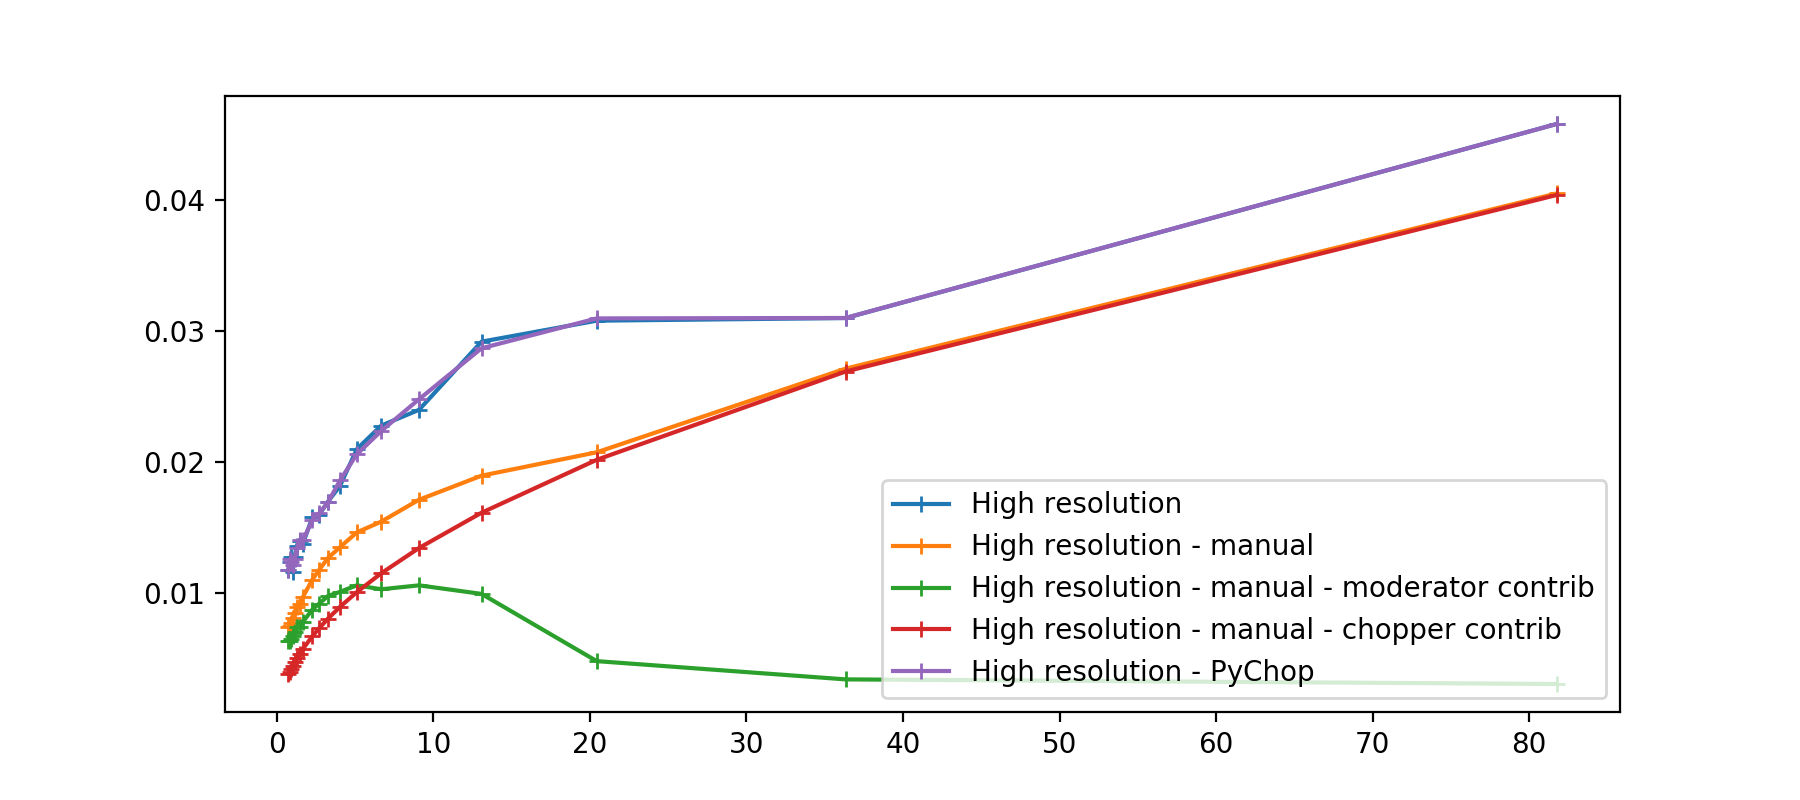

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(9,4))

x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
# ax.loglog(x,y, '+-', label='High resolution')
ax.plot(x, y/x, '+-', label='High resolution')

manual_res, manual_mod, manual_chopper = res(x)
ax.plot(x, manual_res/x, '+-', label='High resolution - manual')
ax.plot(x, manual_mod/x, '+-', label='High resolution - manual - moderator contrib')
ax.plot(x, manual_chopper/x, '+-', label='High resolution - manual - chopper contrib')

instrument.setChopper('High Resolution')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=180.)[0][0] for _ in x]
ax.plot(x, y_pychop/x, '+-', label='High resolution - PyChop')

ax.legend()


It looks like the widths of the 

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,4))

x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
# ax.loglog(x,y, '+-', label='High resolution')
ax.plot(x, y/x, '+-', label='Exp')

manual_res, manual_mod, manual_chopper = res(x, chopper_nu=240., theta=4.4)
ax.plot(x, manual_res/x, '+-', label='manual')
ax.plot(x, manual_mod/x, '+-', label='manual - moderator contrib')
ax.plot(x, manual_chopper/x, '+-', label='manual - chopper contrib')

instrument.setChopper('Intermediate')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=240.)[0][0] for _ in x]
ax.plot(x, y_pychop/x, '+-', label='PyChop')

ax.legend()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,4))

x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
# ax.loglog(x,y, '+-', label='High resolution')
ax.plot(x, y/x, '+-', label='Exp')

manual_res, manual_mod, manual_chopper = res(x, chopper_nu=300., theta=12.0)
ax.plot(x, manual_res/x, '+-', label='manual')
ax.plot(x, manual_mod/x, '+-', label='manual - moderator contrib')
ax.plot(x, manual_chopper/x, '+-', label='manual - chopper contrib')

instrument.setChopper('High Flux')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=300.)[0][0] for _ in x]
ax.plot(x, y_pychop/x, '+-', label='PyChop')

ax.legend()


In [27]:
fwhms*1e6

array([394.74851313, 385.39994119, 359.16945787, 334.72423237,
       326.1219756 , 303.92597574, 283.24064504, 275.43982613,
       267.38882796, 249.19023102, 232.2302383 , 225.08153186,
       209.76238742, 218.04193242, 210.20886838, 195.90196372,
       188.65441948, 187.15739199, 184.99025213, 172.39973718,
       169.84706018, 162.56522965, 163.46157422, 159.76734973,
       152.35615612, 151.66764509, 141.34508089, 140.13305828,
       130.59554295, 114.40472566, 111.15524013, 107.81812931,
        98.50978602,  88.13296151,  83.8457322 ,  71.76044951,
        57.95954918,  37.39485995,  27.10536106,  22.85479121,
        20.17826946,  17.76020967,  15.57782803,  13.6102448 ,
        12.68392577,  11.8206524 ,  10.28172487,   9.58194632,
         9.56763749,   8.91646003])